<a href="https://colab.research.google.com/github/satani99/practical_deep_learning_for_coders/blob/main/neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
  x = torch.linspace(min, max, 100)[:, None]
  if ylim: plt.ylim(ylim)
  plt.plot(x, f(x), color)
  if title is not None: plt.title(title)

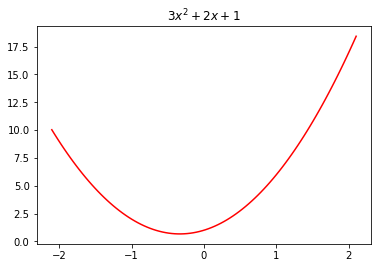

In [2]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [3]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [4]:
def mk_quad(a, b, c): return partial(quad, a, b, c)

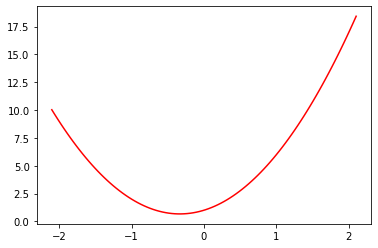

In [5]:
f2 = mk_quad(3, 2, 1)
plot_function(f2)

In [6]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x, mult)) + noise(x, add)

In [7]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x), 0.15, 1.5)

In [9]:
x[:5], y[: 5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]), tensor([[11.8690],
         [ 6.5433],
         [ 5.9396],
         [ 2.6304],
         [ 1.7947]], dtype=torch.float64))

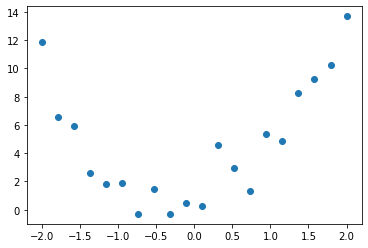

In [10]:
plt.scatter(x, y);

In [12]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
  plt.scatter(x, y)
  plot_function(mk_quad(a, b, c), ylim=(-3, 13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [13]:
def mae(preds, acts): return (torch.abs(preds - acts)).mean()

In [14]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
  f = mk_quad(a, b, c)
  plt.scatter(x, y)
  loss = mae(f(x), y)
  plot_function(f, ylim=(-3, 12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [17]:
def quad_mae(params):
  f = mk_quad(*params)
  return mae(f(x), y)

In [18]:
quad_mae([1.1, 1.1, 1.1])

tensor(2.4219, dtype=torch.float64)

In [19]:
abc = torch.tensor([1.1, 1.1, 1.1])

In [20]:
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [22]:
loss = quad_mae(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [23]:
loss.backward()

In [24]:
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [31]:
with torch.no_grad():
  abc -= abc.grad*0.01
  loss = quad_mae(abc)

print(f'loss={loss:.2f}')

loss=7.53


In [34]:
for i in range(10):
  loss = quad_mae(abc)
  loss.backward()
  with torch.no_grad(): abc -= abc.grad*0.01
  print(f'step={i}; loss={loss:.2f}')

step=0; loss=9.53
step=1; loss=9.42
step=2; loss=9.29
step=3; loss=9.12
step=4; loss=8.92
step=5; loss=8.69
step=6; loss=8.43
step=7; loss=8.13
step=8; loss=7.80
step=9; loss=7.50


In [35]:
def rectified_linear(m, b, x):
  y = m*x + b
  return torch.clip(y, 0.)

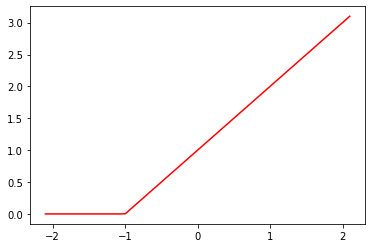

In [36]:
plot_function(partial(rectified_linear, 1, 1))

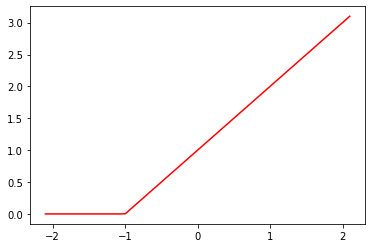

In [37]:
import torch.nn.functional as F
def rectified_linear2(m, b, x): return F.relu(m*x + b)
plot_function(partial(rectified_linear2, 1, 1))

In [38]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
  plot_function(partial(rectified_linear, m, b), ylim=(-1, 4))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [39]:
def double_relu(m1, b1, m2, b2, x):
  return rectified_linear(m1, b1, x) + rectified_linear(m2, b2, x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
  plot_function(partial(double_relu, m1, b1, m2, b2), ylim=(-1, 6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

In [48]:
def triple_relu(m1, b1, m2, b2, m3, b3, x):
  return rectified_linear(m1, b1, x) + rectified_linear(m2, b2, x) + rectified_linear(m3, b3, x)

# plot_scatter(x, y)
@interact(m1=-1.51, b1=-1.51, m2=1.51, b2=1.51, m3=1.51, b3=1.51)
def plot_triple_relu(m1, b1, m2, b2, m3, b3):
  plt.scatter(x, y)
  plot_function(partial(triple_relu, m1, b1, m2, b2, m3, b3), ylim=(-4, 15))

interactive(children=(FloatSlider(value=-1.51, description='m1', max=1.51, min=-4.53), FloatSlider(value=-1.51…